## Simulation of 10 place cells and 10 random cells (aka noise)

Simulation 10 place cells on a linear 1D track. In addition, 10 noise cells firing randomly along the track, active independently of position. 

In [2]:
# 0. Import necessary libraries
import numpy as np
import os
import place_cell_simulations as pcs

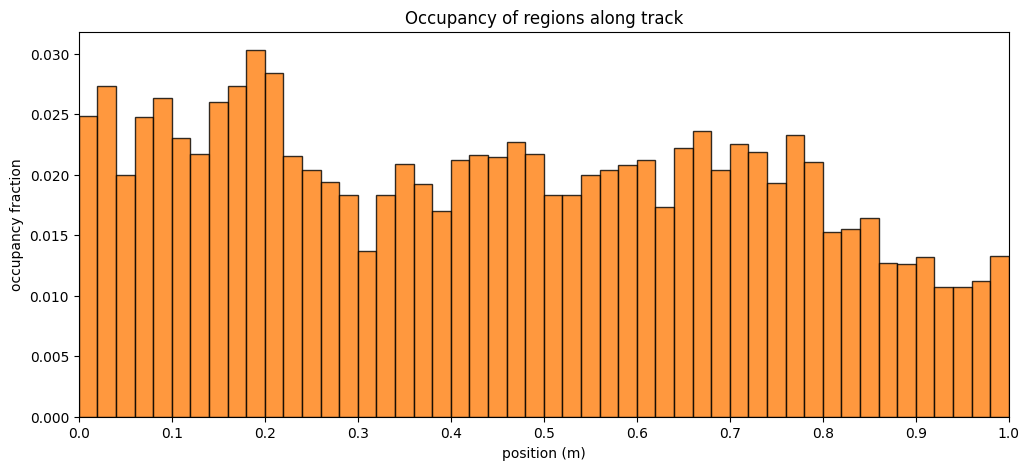

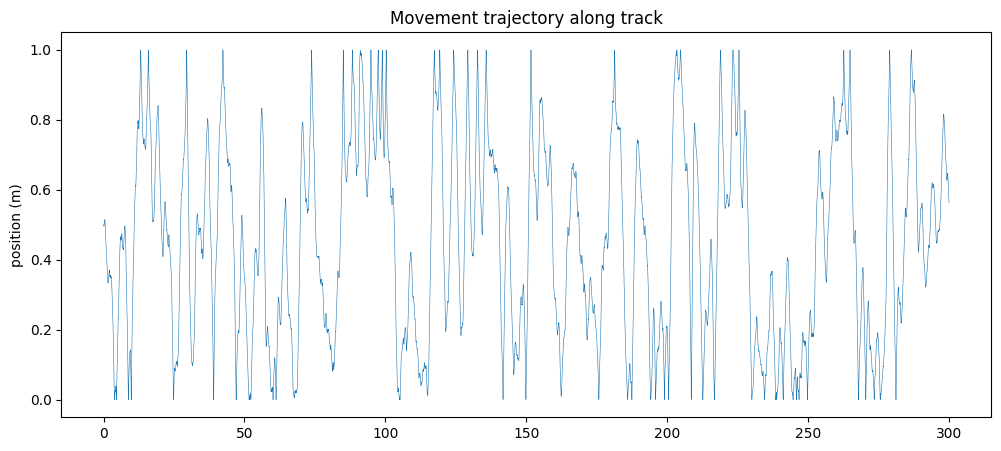

In [3]:
# 1. Generate trajectory along the track, and plot occupancy and position

 # generate trajectory
traj = pcs.generate_trajectory(track_length = 1.0, dt = 0.005, duration_s = 300.0, theta = 1.0, mu = 0.0, sigma = 0.4, v0 = 0.0) 

# Plot occupancy histogram and position over time lineplot
fig1, _ =  pcs.occupancy_plot(pos = traj["pos"], track_length = traj["meta"]["track_length"], n_bins = 50)
    
fig2, _ = pcs.plot_position(traj["time"], pos = traj["pos"], track_length = traj["meta"]["track_length"])

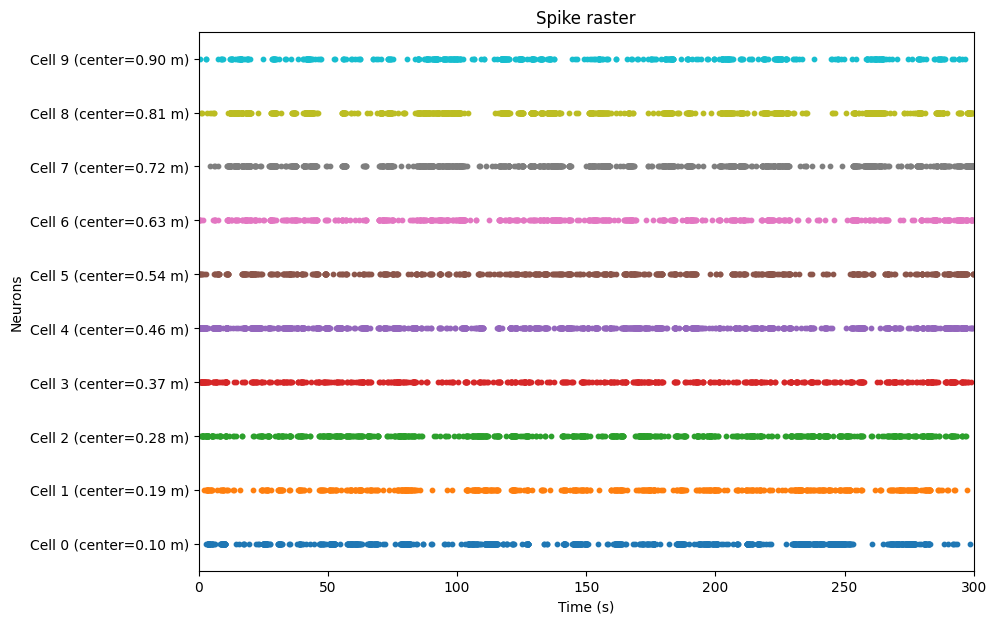

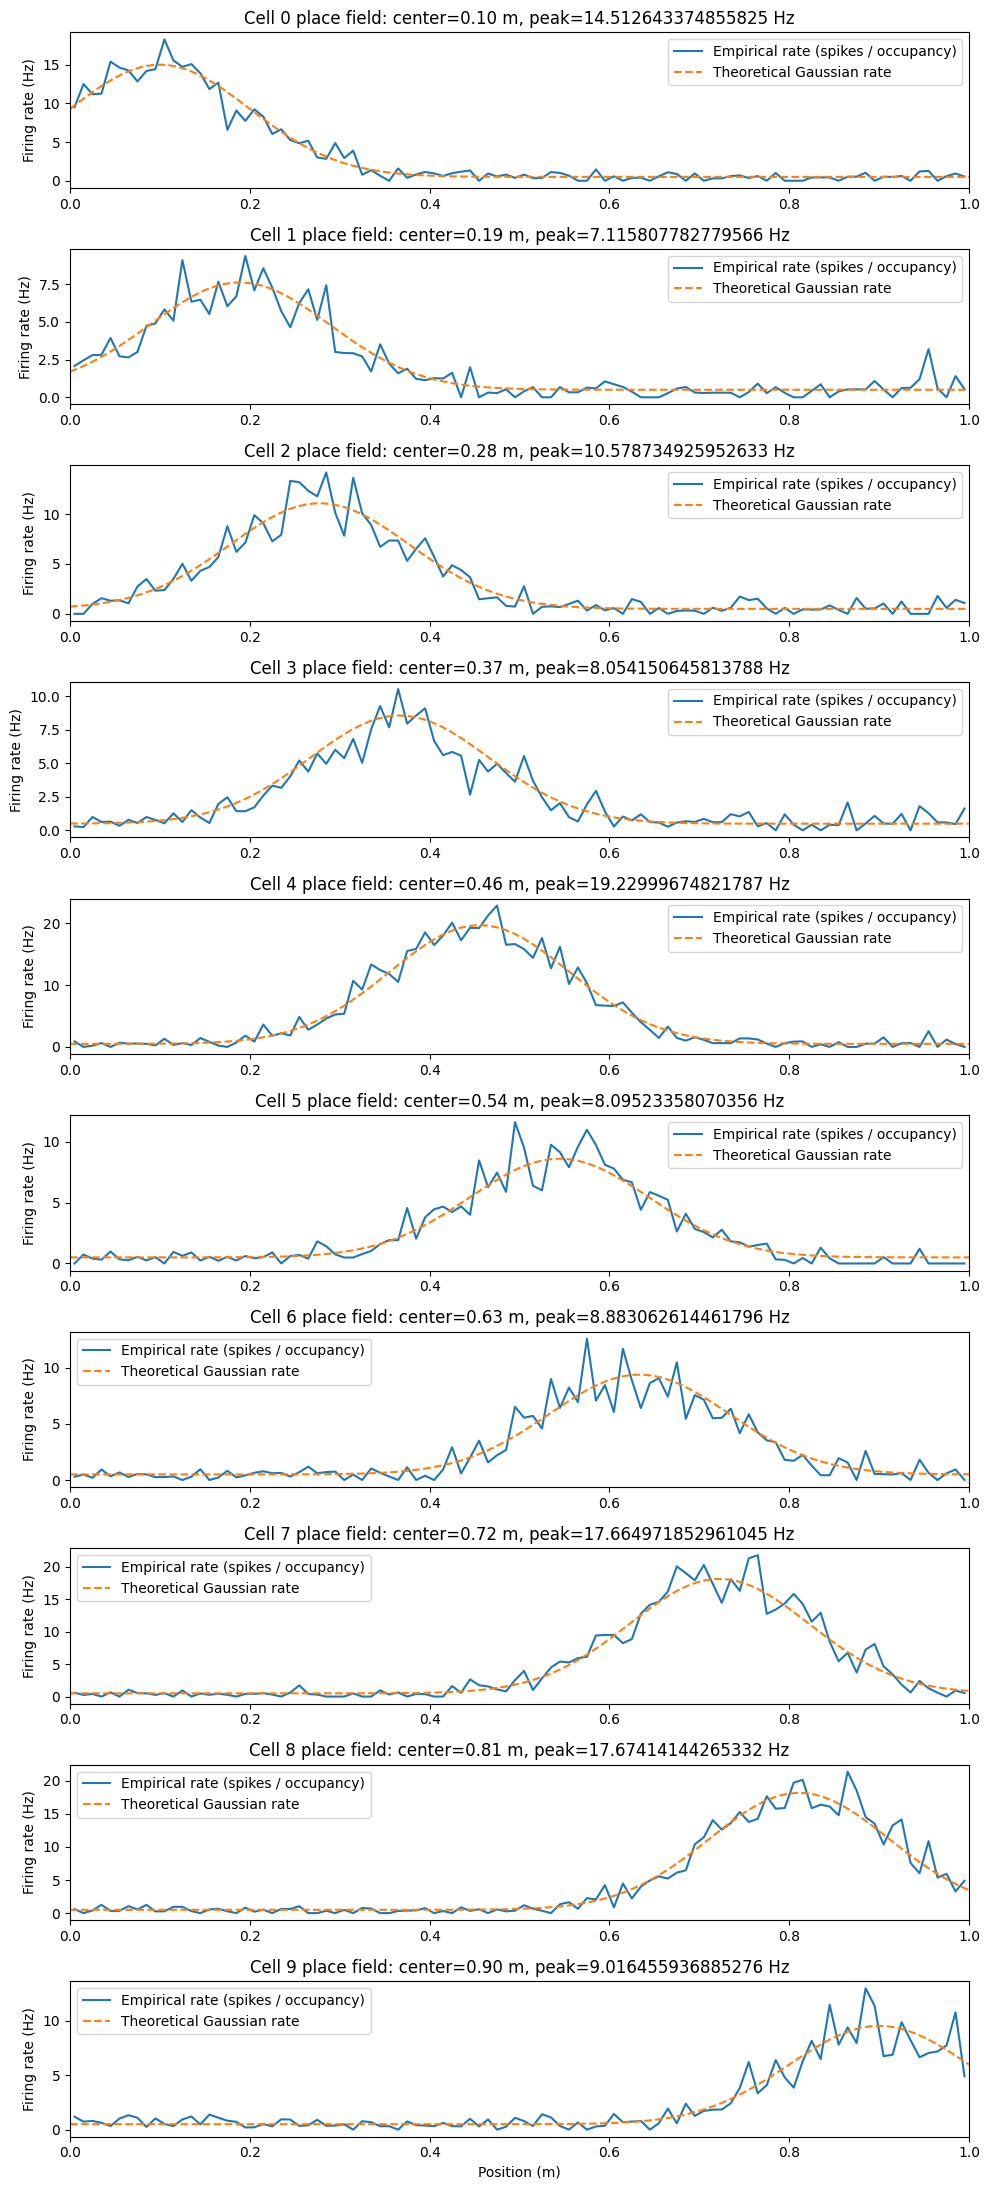

In [4]:
# 2. Generate spikes for place cells, and plot empirical and theoretical rate maps

# parameters for place cells
n_cells = 10
centers = np.linspace(0.1, 0.9, n_cells) # place field centers
sigmas = np.full(n_cells, 0.1) # place field size
peak_rates = np.random.uniform(5, 20, n_cells)
baseline_rate = 0.5
    
# generate spikes 
spikes, spike_times, spike_pos, spike_counts = pcs.generate_place_cell_spikes(centers = centers, sigma_pf = sigmas, peak_rates = peak_rates, 
    baseline_rate = baseline_rate, pos = traj['pos'], time = traj['time'], duration_s = 300.0, dt = 0.005) 

#  generate empirical ratemaps (based on spikes and trajectory) and theoretical ratemaps (based on place field parameters)
empirical_rate_maps, bin_centers = pcs.compute_empirical_rate_maps(n_bins = 100, track_length = traj["meta"]["track_length"],
    pos = traj["pos"], dt = 0.005, spike_positions = spike_pos) 
    
theoretical_rates, x = pcs.compute_theoretical_rate_maps(n_bins = 100, track_length=traj["meta"]["track_length"], centers = centers, sigma_pf = sigmas,
    peak_rates = peak_rates, baseline_rate = baseline_rate)

# plot spike raster and empirical vs theoretical rate maps of place cells 
fig3, _ = pcs.plot_spike_raster(spike_times = spike_times, duration = traj["meta"]["duration_s"], centers = centers)

fig4, _ = pcs.plot_empirical_vs_theoretical_rate(empirical_rates = empirical_rate_maps, theoretical_rates = theoretical_rates, 
                                       bin_centers = bin_centers, centers = centers, peak_rates = peak_rates, 
                                       x = x, track_length = traj["meta"]["track_length"])
    

In [5]:
# 3. Generate spikes for random cells (noise), and plot empirical rate maps

# parameters for noise cells
n_noise = 10
min_noise_rate = 0.1
max_noise_rate = 1.0

# generate spikes for noise cells
noise_spikes = pcs.generate_noise_cell_spikes(n_noise = n_noise, min_rate = min_noise_rate, max_rate = max_noise_rate,  
    duration_s = traj["meta"]["duration_s"], dt = 0.005)



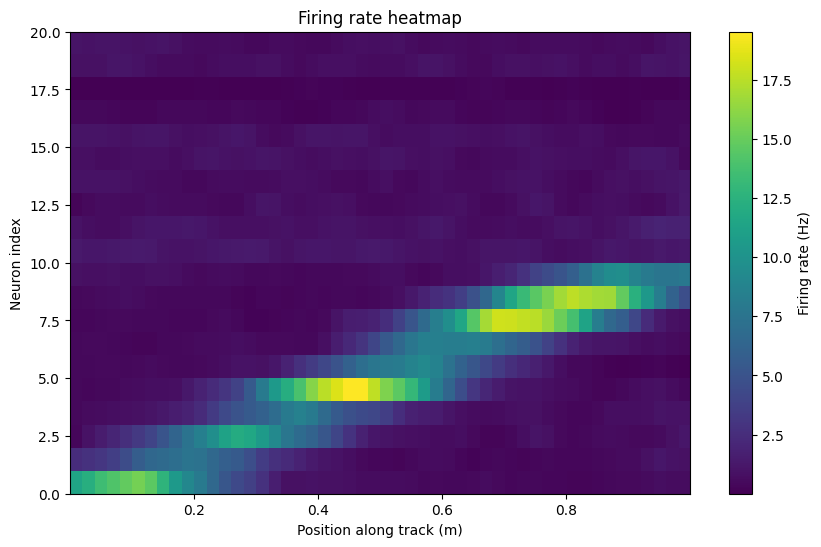

In [6]:
# 4. Plot ratemap for all cells (place and noise)

all_spikes = np.vstack([spikes, noise_spikes])
fig5, _ = pcs.plot_rate_maps(spikes = all_spikes, positions = traj["pos"], times = traj["time"], n_bins = 50, smooth_sigma = 1.0)
    

In [7]:
# 5. Save dataset and ratemap of all neurons
save_dir = os.path.join("..", "data")

figure_path = os.path.join(save_dir, "ratemap_allCells.png")
fig5.savefig(figure_path, dpi=150)
print("Saved figure to", figure_path)

traj["place_cell_spikes"] = spikes
traj["noise_cell_spikes"] = noise_spikes

filepath = os.path.join(save_dir, "experiment_data.npz")
pcs.save_dataset({"time": traj["time"], "pos": traj["pos"], "vel": traj["velocity"], "meta": traj["meta"], 
    "spikes": traj["place_cell_spikes"], "noise_spikes": traj["noise_cell_spikes"]}, filepath)
print("Saved dataset to", filepath)


Saved figure to ../data/ratemap_allCells.png
Saved dataset to ../data/experiment_data.npz
